# Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_excel('Data_Train.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Preprocessing

<h3> The dataset is cleaned of null or redundant values. Columns like date of journey is split into month and day to provide more info. The arrival ,departure time and the duration is further split into hours and minutes. </h3>

In [4]:
train.dropna(inplace=True)

In [5]:
train.shape

(10682, 11)

In [6]:
train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
29h 30m      1
29h 40m      1
5m           1
30h 10m      1
41h 20m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
train["Journey_day"]=pd.to_datetime(train.Date_of_Journey,format="%d/%m/%Y").dt.day
train["Journey_month"]=pd.to_datetime(train.Date_of_Journey,format="%d/%m/%Y").dt.month
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [9]:
train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [10]:
train['Dep_hour']=pd.to_datetime(train["Dep_Time"]).dt.hour
train['Dep_min']=pd.to_datetime(train["Dep_Time"]).dt.minute
train.drop(['Dep_Time'],axis=1,inplace=True)


In [11]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [12]:
train["Arrival_hour"]=pd.to_datetime(train.Arrival_Time).dt.hour
train["Arrival_min"]=pd.to_datetime(train.Arrival_Time).dt.minute
train.drop(['Arrival_Time'],axis=1,inplace=True)

In [13]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [14]:
dur=list(train["Duration"])
for i in range(len(dur)):
    if len(dur[i].split())!=2:
        if "h" in dur[i]:
            dur[i]=dur[i].strip()+" 0m"
        else:
            dur[i]="0h "+dur[i]
dur_h=[]
dur_m=[]
for i in range(len(dur)):
    dur_h.append(int(dur[i].split(sep="h")[0]))
    dur_m.append(int(dur[i].split(sep="m")[0].split()[-1]))

In [15]:
train["Duration_hours"]=dur_h
train["Duration_mins"]=dur_m

In [16]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [17]:
train.drop(["Duration"],axis=1,inplace=True)

In [18]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Categorical data

In [19]:
train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#### The Jet Airways column is removed as it is no longer in service

In [20]:
jet=train[(train['Airline']=='Jet Airways')].index
train.drop(jet,inplace=True)
train["Airline"].value_counts()

IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [21]:
train.shape

(6833, 15)

#### Catplot to visualize the airlines that charges the most. 

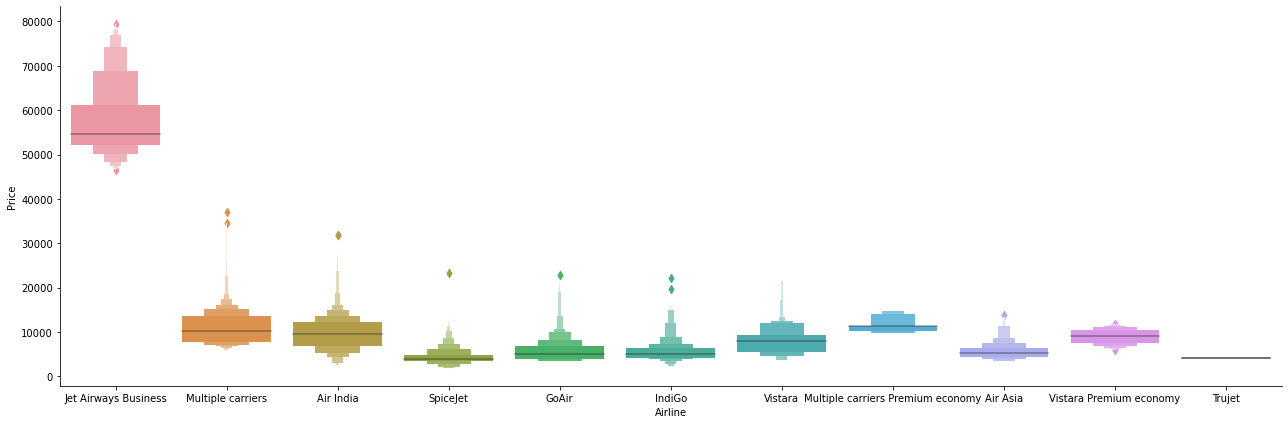

In [22]:
sns.catplot(y="Price",x="Airline",data=train.sort_values("Price",ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [23]:
Airline=train[["Airline"]]                    #One Hot Encoding
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0


In [24]:
train["Source"].value_counts()

Delhi       2950
Kolkata     1615
Banglore    1409
Mumbai       478
Chennai      381
Name: Source, dtype: int64

#### Catplot to visualize the Source city that has the highest air fare

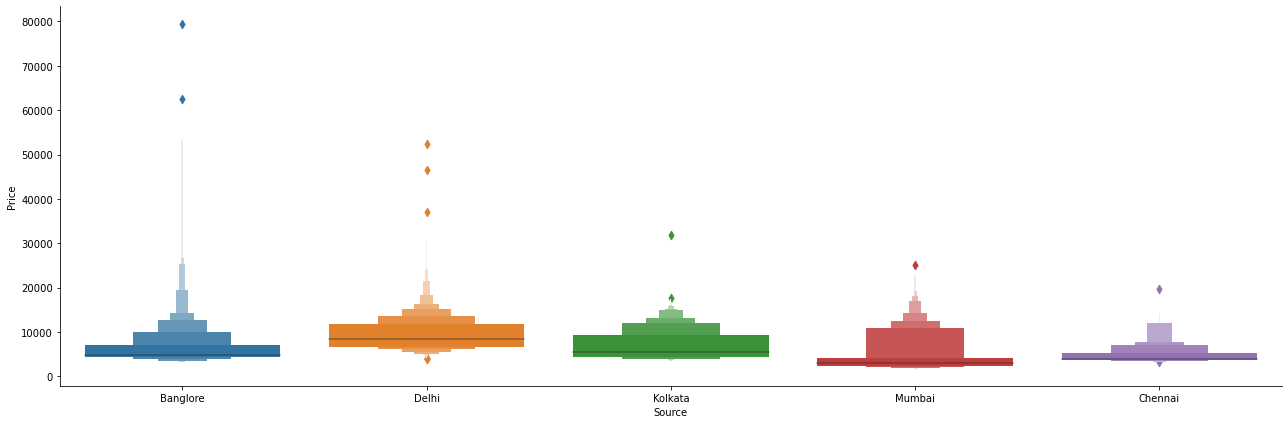

In [25]:
sns.catplot(y="Price",x="Source",data=train.sort_values("Price",ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [26]:
source=train[['Source']]            
source=pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


In [27]:
train['Destination'].value_counts()

Cochin       2950
Banglore     1615
Delhi         895
New Delhi     514
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

In [28]:
dest=train[['Destination']]            
dest=pd.get_dummies(dest,drop_first=True)
dest.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0


#### Since majority of the Additional Info column had redundant data, it is dropped. The route column is also dropped because the same information is provided in the form of total number of stops.

In [29]:
train.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [30]:
train["Total_Stops"].value_counts()

1 stop      3090
non-stop    2868
2 stops      829
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
train.replace({"non-stop" :0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)


In [32]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25


In [33]:
df=pd.concat([train, Airline, source, dest],axis=1)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,...,0,0,0,1,0,0,0,0,0,0


In [34]:
df.drop(["Airline","Source","Destination"],axis=1,inplace=True)
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
5,0,3873,24,6,9,0,11,25,2,25,...,0,0,0,1,0,0,0,0,0,0


In [35]:
df.shape

(6833, 29)

## Test Dataset
### The test dataset will undergo the same preprocessing techniques as done for the training set

In [36]:
test=pd.read_excel("Test_set.xlsx")
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [37]:
test.shape

(2671, 10)

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [39]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [40]:
test["Journey_day"]=pd.to_datetime(test.Date_of_Journey,format="%d/%m/%Y").dt.day
test["Journey_month"]=pd.to_datetime(test.Date_of_Journey,format="%d/%m/%Y").dt.month
test.drop(['Date_of_Journey'],axis=1,inplace=True)
test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [41]:
test['Dep_hour']=pd.to_datetime(test["Dep_Time"]).dt.hour
test['Dep_min']=pd.to_datetime(test["Dep_Time"]).dt.minute
test.drop(['Dep_Time'],axis=1,inplace=True)
test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [42]:
test["Arrival_hour"]=pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"]=pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(['Arrival_Time'],axis=1,inplace=True)
test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [43]:
dur=list(test["Duration"])
for i in range(len(dur)):
    if len(dur[i].split())!=2:
        if "h" in dur[i]:
            dur[i]=dur[i].strip()+" 0m"
        else:
            dur[i]="0h "+dur[i]
dur_h=[]
dur_m=[]
for i in range(len(dur)):
    dur_h.append(int(dur[i].split(sep="h")[0]))
    dur_m.append(int(dur[i].split(sep="m")[0].split()[-1]))

In [44]:
test["Duration_hours"]=dur_h
test["Duration_mins"]=dur_m
test.drop(["Duration"],axis=1,inplace=True)
test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [45]:
jet=test[(test['Airline']=='Jet Airways')].index
test.drop(jet,inplace=True)
test["Airline"].value_counts()

IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [46]:
test.shape

(1774, 14)

In [47]:
Airline=test[["Airline"]]                    #One Hot Encoding
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
1,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0


In [48]:
source=test[['Source']]            #One hot encoding
source=pd.get_dummies(source,drop_first=True)
dest=test[['Destination']]            #One hot encoding
dest=pd.get_dummies(dest,drop_first=True)


In [49]:
test.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [50]:
test.replace({"non-stop" :0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)


In [51]:
dt=pd.concat([test, Airline, source, dest],axis=1)
dt.drop(["Airline","Source","Destination"],axis=1,inplace=True)
dt.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0
6,1,12,3,7,30,22,35,15,5,1,...,0,0,0,0,0,0,0,0,0,1
7,1,1,5,15,15,20,30,5,15,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
#feature selection#

In [53]:
df.shape

(6833, 29)

In [54]:
X=df.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']
      ]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1
5,0,24,6,9,0,11,25,2,25,0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
y=df.iloc[:,1]    #dependent feature
y.head()

0     3897
1     7662
3     6218
4    13302
5     3873
Name: Price, dtype: int64

## Feature Extraction
### Heatmap is used to visualize the feature with the highest correlation. Extra Trees Regressor is used to confirm the most important feature that contributes to the price

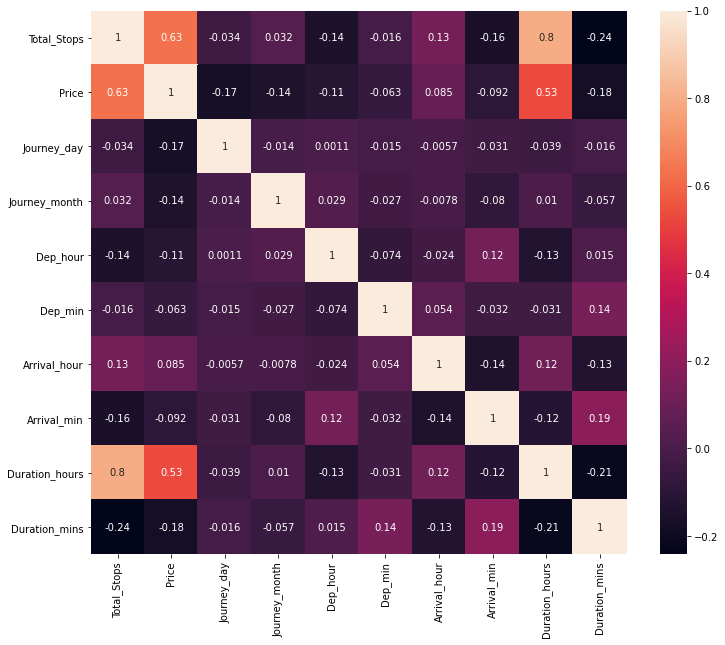

In [56]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [57]:
from sklearn.ensemble import ExtraTreesRegressor
sel=ExtraTreesRegressor()
sel.fit(X,y)

ExtraTreesRegressor()

In [58]:
print(sel.feature_importances_)

[2.69948914e-01 1.04107452e-01 6.43263987e-02 2.87961304e-02
 2.93979406e-02 2.91150061e-02 2.45434831e-02 1.05628610e-01
 2.31552638e-02 1.99299600e-02 3.01683593e-03 3.02426207e-02
 1.27656451e-01 3.56098355e-02 1.71286307e-03 4.66463639e-03
 1.93599151e-04 9.96109912e-03 1.65183374e-04 9.63618510e-04
 2.36933391e-02 4.65977951e-03 3.36865744e-03 2.88675781e-02
 9.95543766e-04 3.45865471e-03 8.82183275e-04 2.09383631e-02]


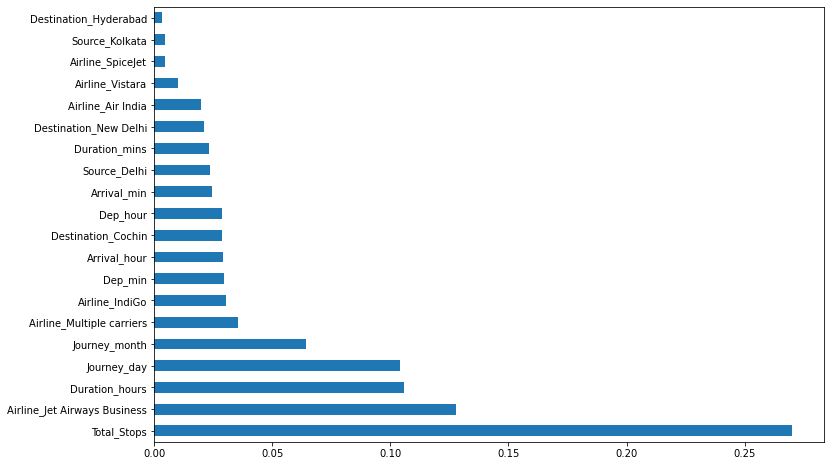

In [59]:
plt.figure(figsize=(12,8))
f=pd.Series(sel.feature_importances_,index=X.columns)
f.nlargest(20).plot(kind='barh')
plt.show()

#### From the graph above we can conclude that the total number of stops is the most important contributing factor to the price

## Train Test split

### Here the dataset is split with 80:20 ratio

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
acc=[]
labels=[]

## Applying Algorithms

## 1. Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [62]:
ypred=rf.predict(X_test)
rf.score(X_train,y_train)

0.9734441626660716

In [63]:
RF_Test=rf.score(X_test,y_test)
acc.append(RF_Test)
labels.append('Random FR')
RF_Test

0.8255635086761441

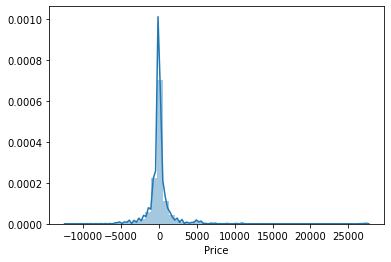

In [64]:
sns.distplot(y_test-ypred)
plt.show()

In [65]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,ypred))
print("MSE:",metrics.mean_squared_error(y_test,ypred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,ypred)))

MAE: 783.3069091669121
MSE: 3175304.4980266998
RMSE: 1781.9384102787335


In [66]:
metrics.r2_score(y_test,ypred)

0.8255635086761441

###  a) Random forest regressor with Random Search CV

In [67]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,10]
min_samples_leaf=[1,2,5,10]


In [68]:
rg={'n_estimators':n_estimators,
   'max_depth':max_depth,
   'max_features':max_features,
   'min_samples_split':min_samples_split,
   'min_samples_leaf':min_samples_leaf}
random_rf=RandomizedSearchCV(estimator=rf,param_distributions=rg,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [69]:
random_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [70]:
random_rf.best_score_

-3141369.6900734142

In [71]:
random_rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [72]:
pred=random_rf.predict(X_test)

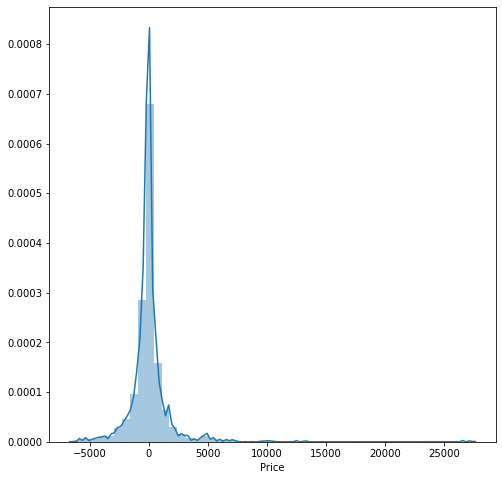

In [73]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-pred)
plt.show()

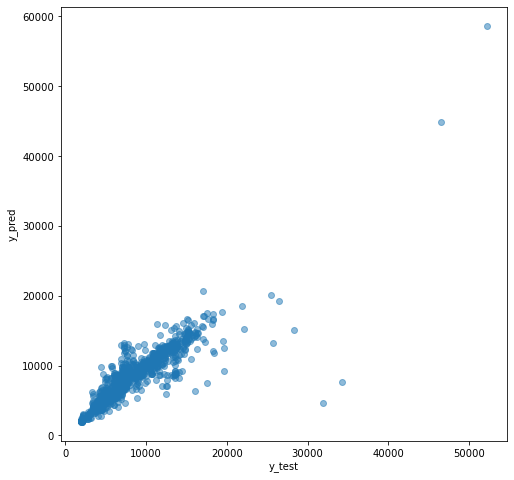

In [74]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
metrics.r2_score(y_test,pred)

## 2. Gradient Boosting Regressor

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=42)
gbr.fit(X_train,y_train)


GradientBoostingRegressor(random_state=42)

In [76]:
gbr.predict(X_test)

array([ 8943.5790499 ,  3751.27539524, 10469.7542301 , ...,
        2283.77095584,  4550.0220661 , 10311.16770944])

In [77]:
GBR_Test=gbr.score(X_test,y_test)
acc.append(GBR_Test)
labels.append('GBR')
GBR_Test

0.733351011782732

### a) Gradient Boosting Regressor with Randomized Search CV

In [78]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8,10]
                 }
random_gbr=RandomizedSearchCV(estimator=gbr, param_distributions=parameters, cv = 2, n_jobs=-1)
random_gbr.fit(X_train,y_train)
GBR_Rscv_Test=random_gbr.best_score_
acc.append(GBR_Rscv_Test)
labels.append('GBR & Rscv')
GBR_Rscv_Test

0.7757479127706987

### b) Gradient Boosting Regressor with Grid Search Cv

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8,10,20,50]
                 }
GBR=GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
GBR_grid_Test=grid_GBR.best_score_
acc.append(GBR_grid_Test)
labels.append('GBR & Grid')
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=1000)

 The best score across ALL searched params:
 0.7964232972035477

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 1000}


## 3. Ada Boost Regressor

In [80]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(random_state=42)
abr.fit(X_train,y_train)

AdaBoostRegressor(random_state=42)

In [81]:
abr.predict(X_test)

array([ 9677.34966499,  5467.16312057, 12080.45611702, ...,
        5467.16312057,  5467.16312057, 10358.37966538])

In [82]:
ABR_Test=abr.score(X_test,y_test)
acc.append(ABR_Test)
labels.append('ABR')
ABR_Test

0.5752200473173084

## 4. SVR (linear kernel)

In [83]:
from sklearn.svm import SVR
lin_svr=SVR(kernel='linear')
lin_svr.fit(X_train,y_train)

SVR(kernel='linear')

In [84]:
lin_svr.predict(X_test)

array([ 7660.24723784,  4235.9769029 , 11405.42850885, ...,
        3346.08746115,  4649.46362464,  8141.4047262 ])

In [85]:
SVR_Test=lin_svr.score(X_test,y_test)
acc.append(SVR_Test)
labels.append('SVR')
SVR_Test

0.3773018238579783

###  SVR (rbf kernel)

In [86]:
from sklearn.svm import SVR
rbf_svr=SVR(kernel='rbf')
rbf_svr.fit(X_train,y_train)

SVR()

In [87]:
rbf_svr.predict(X_test)

array([6699.31264997, 6435.43049841, 6702.34465831, ..., 6497.24097121,
       6548.16818177, 6706.78052821])

In [88]:
rbf_svr.score(X_test,y_test)

-0.029628806534985674

## 5. Decision Tree Regressor

In [89]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [90]:
dtr.predict(X_test)

array([ 7005. ,  4007.5,  8236. , ...,  2017. ,  3597. , 11200. ])

In [91]:
DTR_Test=dtr.score(X_test,y_test)
acc.append(DTR_Test)
labels.append('DTR')
DTR_Test

0.7051537597675532

### a) Decision Tree Regressor with Randomized Search CV

In [92]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,50,100,200,500,1000] }
random_dtr=RandomizedSearchCV(estimator=dtr,param_distributions=parameters,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42)

In [93]:
random_dtr.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] splitter=best, min_samples_leaf=1, max_leaf_nodes=50, max_features=log2, max_depth=3 
[CV]  splitter=best, min_samples_leaf=1, max_leaf_nodes=50, max_features=log2, max_depth=3, total=   0.0s
[CV] splitter=best, min_samples_leaf=1, max_leaf_nodes=50, max_features=log2, max_depth=3 
[CV]  splitter=best, min_samples_leaf=1, max_leaf_nodes=50, max_features=log2, max_depth=3, total=   0.0s
[CV] splitter=best, min_samples_leaf=1, max_leaf_nodes=50, max_features=log2, max_depth=3 
[CV]  splitter=best, min_samples_leaf=1, max_leaf_nodes=50, max_features=log2, max_depth=3, total=   0.0s
[CV] splitter=best, min_samples_leaf=1, max_leaf_nodes=50, max_features=log2, max_depth=3 
[CV]  splitter=best, min_samples_leaf=1, max_leaf_nodes=50, max_features=log2, max_depth=3, total=   0.0s
[CV] splitter=best, min_samples_leaf=1, max_leaf_nodes=50, max_features=log2, max_depth=3 
[CV]  splitter=best, min_samples_leaf=1, max_leaf_nodes=50, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] splitter=best, min_samples_leaf=7, max_leaf_nodes=20, max_features=None, max_depth=9 
[CV]  splitter=best, min_samples_leaf=7, max_leaf_nodes=20, max_features=None, max_depth=9, total=   0.0s
[CV] splitter=best, min_samples_leaf=7, max_leaf_nodes=20, max_features=None, max_depth=9 
[CV]  splitter=best, min_samples_leaf=7, max_leaf_nodes=20, max_features=None, max_depth=9, total=   0.0s
[CV] splitter=best, min_samples_leaf=7, max_leaf_nodes=20, max_features=None, max_depth=9 
[CV]  splitter=best, min_samples_leaf=7, max_leaf_nodes=20, max_features=None, max_depth=9, total=   0.0s
[CV] splitter=best, min_samples_leaf=7, max_leaf_nodes=20, max_features=None, max_depth=9 
[CV]  splitter=best, min_samples_leaf=7, max_leaf_nodes=20, max_features=None, max_depth=9, total=   0.0s
[CV] splitter=best, min_samples_leaf=4, max_leaf_nodes=1000, max_features=sqrt, max_depth=1 
[CV]  splitter=best, min_samples_leaf=4, max_leaf_nodes=1000, max_features=sqrt, max_depth=1, total=   0.0s
[CV] split

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 50,
                                                           100, 200, 500,
                                                           1000],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [94]:
random_dtr.best_params_

{'splitter': 'best',
 'min_samples_leaf': 7,
 'max_leaf_nodes': 100,
 'max_features': None,
 'max_depth': 11}

In [95]:
pred_dtr=random_dtr.predict(X_test)

In [96]:
tuned_dtr=DecisionTreeRegressor(splitter='random',min_samples_leaf=6,max_leaf_nodes=500,max_features=None,max_depth=9).fit(X_train,y_train)
tpred=tuned_dtr.predict(X_test)
DTR_Rscv_Test=tuned_dtr.score(X_test,y_test)
acc.append(DTR_Rscv_Test)
labels.append('DTR & Rscv')
DTR_Rscv_Test

0.6749802861620742

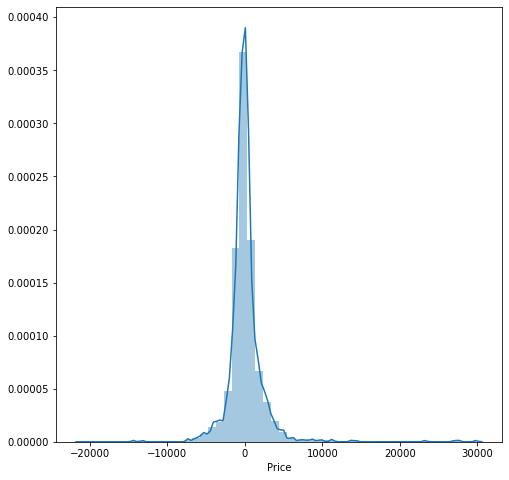

In [97]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-pred_dtr)
plt.show()

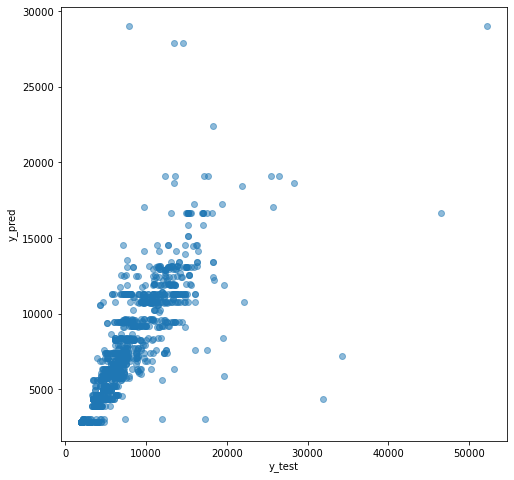

In [98]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,pred_dtr,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### b) Decision Tree Regressor with Grid Search CV

In [99]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,7,9,11,12],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,50,100,200,500,1000] }

from sklearn.model_selection import GridSearchCV
grid_dtr=GridSearchCV(dtr,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=2)

In [100]:
grid_dtr.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_no

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=1, max_features=auto, max_leaf_nodes=200, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=200, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=200, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=200, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=200, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=200, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=200, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=200, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=200, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=500, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=500, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=500, splitter=best 
[CV]  max_depth=1, max_features=au

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=10, splitter=best 
[CV]  max_depth=1, max_f

[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=100, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=100, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=100, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=100, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=100, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=100, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=100, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=100, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=100, splitter=random 
[CV]  max_depth=1, max_features=None,

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=100, splitter=best, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=100, splitter=best 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=100, splitter=best, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=100, splitter=random 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=100, splitter=random, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=100, splitter=random 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=100, splitter=random, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=100, splitter=random 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=100, splitter=random, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=200, splitter=best 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=200, splitter=best, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=200, splitter=best 
[CV]  max_depth=7, max_features=au

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=None, splitter=best, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=None, splitter=random, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=None, splitter=random, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=None, splitter=random, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=10, splitter=best 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=10, splitter=best, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=10, splitter=best 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=10, splitter=best, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=10, splitter=best 
[CV]  max_depth=7, max_features=

[CV]  max_depth=7, max_features=None, max_leaf_nodes=None, splitter=random, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=10, splitter=best 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=10, splitter=best, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=10, splitter=best 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=10, splitter=best, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=10, splitter=best 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=10, splitter=best, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=10, splitter=random 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=10, splitter=random, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=10, splitter=random 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=10, splitter=random, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=10, splitter=random 
[CV]  max_depth=7, max_features=None, max_le

[CV]  max_depth=9, max_features=auto, max_leaf_nodes=20, splitter=random, total=   0.0s
[CV] max_depth=9, max_features=auto, max_leaf_nodes=50, splitter=best 
[CV]  max_depth=9, max_features=auto, max_leaf_nodes=50, splitter=best, total=   0.0s
[CV] max_depth=9, max_features=auto, max_leaf_nodes=50, splitter=best 
[CV]  max_depth=9, max_features=auto, max_leaf_nodes=50, splitter=best, total=   0.0s
[CV] max_depth=9, max_features=auto, max_leaf_nodes=50, splitter=best 
[CV]  max_depth=9, max_features=auto, max_leaf_nodes=50, splitter=best, total=   0.0s
[CV] max_depth=9, max_features=auto, max_leaf_nodes=50, splitter=random 
[CV]  max_depth=9, max_features=auto, max_leaf_nodes=50, splitter=random, total=   0.0s
[CV] max_depth=9, max_features=auto, max_leaf_nodes=50, splitter=random 
[CV]  max_depth=9, max_features=auto, max_leaf_nodes=50, splitter=random, total=   0.0s
[CV] max_depth=9, max_features=auto, max_leaf_nodes=50, splitter=random 
[CV]  max_depth=9, max_features=auto, max_leaf

[CV]  max_depth=9, max_features=log2, max_leaf_nodes=200, splitter=best, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=200, splitter=random 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=200, splitter=random, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=200, splitter=random 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=200, splitter=random, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=200, splitter=random 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=200, splitter=random, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=500, splitter=best 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=500, splitter=best, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=500, splitter=best 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=500, splitter=best, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=500, splitter=best 
[CV]  max_depth=9, max_features=lo

[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=1000, splitter=random, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=1000, splitter=random 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=1000, splitter=random, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=1000, splitter=random 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=1000, splitter=random, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=None, splitter=best 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=None, splitter=best, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=None, splitter=best 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=None, splitter=best, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=None, splitter=best 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=None, splitter=best, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=9, max

[CV]  max_depth=11, max_features=auto, max_leaf_nodes=None, splitter=best, total=   0.0s
[CV] max_depth=11, max_features=auto, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=11, max_features=auto, max_leaf_nodes=None, splitter=random, total=   0.0s
[CV] max_depth=11, max_features=auto, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=11, max_features=auto, max_leaf_nodes=None, splitter=random, total=   0.0s
[CV] max_depth=11, max_features=auto, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=11, max_features=auto, max_leaf_nodes=None, splitter=random, total=   0.0s
[CV] max_depth=11, max_features=auto, max_leaf_nodes=10, splitter=best 
[CV]  max_depth=11, max_features=auto, max_leaf_nodes=10, splitter=best, total=   0.0s
[CV] max_depth=11, max_features=auto, max_leaf_nodes=10, splitter=best 
[CV]  max_depth=11, max_features=auto, max_leaf_nodes=10, splitter=best, total=   0.0s
[CV] max_depth=11, max_features=auto, max_leaf_nodes=10, splitter=best 
[CV]  max_depth=11, 

[CV]  max_depth=11, max_features=log2, max_leaf_nodes=500, splitter=best, total=   0.0s
[CV] max_depth=11, max_features=log2, max_leaf_nodes=500, splitter=best 
[CV]  max_depth=11, max_features=log2, max_leaf_nodes=500, splitter=best, total=   0.0s
[CV] max_depth=11, max_features=log2, max_leaf_nodes=500, splitter=best 
[CV]  max_depth=11, max_features=log2, max_leaf_nodes=500, splitter=best, total=   0.0s
[CV] max_depth=11, max_features=log2, max_leaf_nodes=500, splitter=random 
[CV]  max_depth=11, max_features=log2, max_leaf_nodes=500, splitter=random, total=   0.0s
[CV] max_depth=11, max_features=log2, max_leaf_nodes=500, splitter=random 
[CV]  max_depth=11, max_features=log2, max_leaf_nodes=500, splitter=random, total=   0.0s
[CV] max_depth=11, max_features=log2, max_leaf_nodes=500, splitter=random 
[CV]  max_depth=11, max_features=log2, max_leaf_nodes=500, splitter=random, total=   0.0s
[CV] max_depth=11, max_features=log2, max_leaf_nodes=1000, splitter=best 
[CV]  max_depth=11, m

[CV]  max_depth=11, max_features=sqrt, max_leaf_nodes=1000, splitter=best, total=   0.0s
[CV] max_depth=11, max_features=sqrt, max_leaf_nodes=1000, splitter=random 
[CV]  max_depth=11, max_features=sqrt, max_leaf_nodes=1000, splitter=random, total=   0.0s
[CV] max_depth=11, max_features=sqrt, max_leaf_nodes=1000, splitter=random 
[CV]  max_depth=11, max_features=sqrt, max_leaf_nodes=1000, splitter=random, total=   0.0s
[CV] max_depth=11, max_features=sqrt, max_leaf_nodes=1000, splitter=random 
[CV]  max_depth=11, max_features=sqrt, max_leaf_nodes=1000, splitter=random, total=   0.0s
[CV] max_depth=11, max_features=None, max_leaf_nodes=None, splitter=best 
[CV]  max_depth=11, max_features=None, max_leaf_nodes=None, splitter=best, total=   0.0s
[CV] max_depth=11, max_features=None, max_leaf_nodes=None, splitter=best 
[CV]  max_depth=11, max_features=None, max_leaf_nodes=None, splitter=best, total=   0.0s
[CV] max_depth=11, max_features=None, max_leaf_nodes=None, splitter=best 
[CV]  max_

[CV] max_depth=12, max_features=auto, max_leaf_nodes=None, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=None, splitter=best, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=None, splitter=random, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=None, splitter=random, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=None, splitter=random 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=None, splitter=random, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=10, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=10, splitter=best, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=10, splitter=best 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=10, splitter=best, total=   0.0s
[CV] max_depth=12,

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, splitter=best, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=10, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, splitter=best, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=10, splitter=random 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, splitter=random, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=10, splitter=random 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, splitter=random, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=10, splitter=random 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=10, splitter=random, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=20, splitter=best 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=20, splitter=best, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=20, splitter=best 
[CV]  max_depth=12, max_features=l

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, splitter=random, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=50, splitter=random 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, splitter=random, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=50, splitter=random 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=50, splitter=random, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=100, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=100, splitter=best, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=100, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=100, splitter=best, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=100, splitter=best 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=100, splitter=best, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=100, splitter=random 
[CV]  max_depth=12, max_fea

[CV]  max_depth=12, max_features=None, max_leaf_nodes=500, splitter=random, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=500, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=500, splitter=random, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=1000, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=1000, splitter=best, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=1000, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=1000, splitter=best, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=1000, splitter=best 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=1000, splitter=best, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=1000, splitter=random 
[CV]  max_depth=12, max_features=None, max_leaf_nodes=1000, splitter=random, total=   0.0s
[CV] max_depth=12, max_features=None, max_leaf_nodes=1000, splitter=random 
[CV]  max_dep

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:    8.1s finished


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 50, 100, 200, 500,
                                            1000],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=2)

In [101]:
grid_dtr.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'max_leaf_nodes': 1000,
 'splitter': 'random'}

In [102]:
tune_grid_dtr=DecisionTreeRegressor(max_depth=11,max_features=None,max_leaf_nodes=None,splitter='random').fit(X_train,y_train)
tgpred=tune_grid_dtr.predict(X_test)
DTR_grid_Test=tune_grid_dtr.score(X_test,y_test)
acc.append(DTR_grid_Test)
labels.append('DTR & Grid')
DTR_grid_Test

0.7460113210399755

## 6. Linear Regression

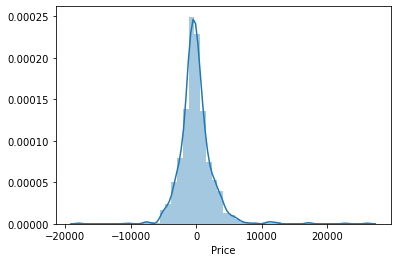

MAE: 1673.200369026403
MSE: 6526149.256506182
RMSE: 2554.632900537019


In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
ly_pred = lin_model.predict(X_test)
lin_model.score(X_train, y_train)

sns.distplot(y_test-ly_pred)
plt.show()
print('MAE:', metrics.mean_absolute_error(y_test, ly_pred))
print('MSE:', metrics.mean_squared_error(y_test, ly_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ly_pred)))

In [104]:
LR_Test=lin_model.score(X_test, y_test)
acc.append(LR_Test)
labels.append('LR')
LR_Test

0.641483650192229

SelectKBest----> Incorrect features..

In [105]:
from sklearn.feature_selection import SelectKBest, chi2
test=SelectKBest(score_func=chi2, k=4)
fit=test.fit(X_train,y_train)
features = fit.transform(X_train)

In [106]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score')) 

            Specs         Score
4         Dep_min  46708.777685
7  Duration_hours  36583.267782
6     Arrival_min  32401.653635
8   Duration_mins  29848.114063
5    Arrival_hour  12236.609193


## 7. Ridge

In [107]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train,y_train)
Ridge_Test=clf.score(X_test,y_test)
acc.append(Ridge_Test)
labels.append('Ridge')
Ridge_Test

0.6556352410794407

### RidgeCV

In [108]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
RidgeCV_Test=clf.score(X_test,y_test)
acc.append(RidgeCV_Test)
labels.append('Ridge CV')
RidgeCV_Test

0.6441703536437238

## 8. Kernel Ridge

In [109]:
from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(alpha=1.0).fit(X_train,y_train)
Kernel_Test=clf.score(X_test,y_test)
acc.append(Kernel_Test)
labels.append('Kernel Ridge')
Kernel_Test

0.6560129344044847

## 9. K-Nearest Neighbors Regressor

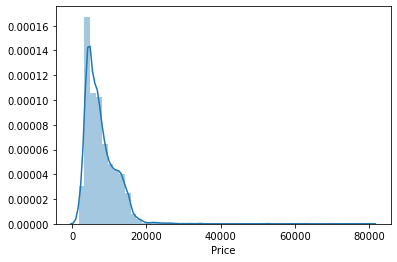

In [110]:
sns.distplot(y)

In [111]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train,y_train)
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9847431805979177


In [112]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.4676627535038159


In [113]:
KNR_Test=regressor.score(X_test, y_test)
acc.append(KNR_Test)
labels.append('KNR_1')
KNR_Test

0.4676627535038159

### Predicting R2 value for KNN

In [114]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [115]:
score.mean()

0.5511661581415173

In [116]:
prediction=regressor.predict(X_test)

In [117]:
regressor=KNeighborsRegressor(n_neighbors=3)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [118]:
#### another method to find r2 value

In [119]:
ypredi=regressor.predict(X_test)
metrics.r2_score(y_test,ypredi)

0.5593068069072755

In [120]:
acc.append(regressor.score(X_test,y_test))
labels.append('KNR_3')
regressor.score(X_test,y_test)

0.5593068069072755

## Hyperparameter Tuning KNN Regressor

In [121]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    accuracy_rate.append(score.mean())

In [122]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train)
score=cross_val_score(knn,X,y,cv=10)
predictions = knn.predict(X_test)

In [123]:
acc.append(score.mean())
labels.append('KNR_hp-1')
score.mean()

0.5554222244228879

In [124]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1422.6642282370153
MSE: 9690247.954645209
RMSE: 3112.916310253973


In [125]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=3
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train,y_train)
score=cross_val_score(knn,X,y,cv=10)
predictions = knn.predict(X_test)

In [126]:
acc.append(score.mean())
labels.append('KNR_hp-3')
score.mean()

0.6282223527264866

In [127]:
#after hypertuning values decreased
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1411.8931967812728
MSE: 8022031.787368934
RMSE: 2832.3191535151777


In [128]:
#before hypertuning
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1422.6642282370153
MSE: 9690247.954645209
RMSE: 3112.916310253973


## 10.Lasso

In [129]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=5)
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
Lasso_Test=lasso_regressor.best_score_
acc.append(Lasso_Test)
labels.append('Lasso')
Lasso_Test

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15436360681.987621, tolerance: 9476423.494285494
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16019108807.591276, tolerance: 9244485.990503276
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16000266707.977024, tolerance: 9576694.243397731
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Object

{'alpha': 0.01}


0.6576474544213008

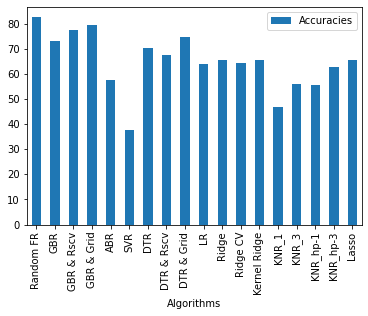

In [130]:
acc=[round(100*i,2) for i in acc]
ds=pd.DataFrame(list(zip(labels,acc)),columns=['Algorithms','Accuracies'])
ds.set_index("Algorithms",inplace=True)
ds.plot.bar()

# Pickel the file
### The file is pickled with the selected model for the web application.

In [131]:
import pickle
file=open('rfr.pkl','wb')
pickle.dump(random_rf,file)


In [132]:
model=open('rfr.pkl','rb')
f=pickle.load(model)
y_pred=f.predict(X_test)
metrics.r2_score(y_test,y_pred)

0.8135592206909515